<a href="https://colab.research.google.com/github/TejasGangane/StressDetectionSystem/blob/main/Stress_Level_Detetction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
*This report explains the process of building a machine learning model to predict stress levels based on humidity and temperature. The model uses a Random Forest Classifier to classify stress levels accurately*

# 📂 Dataset Overview

## Labelled Dataset Humidity Temperature Stress.csv

*   Humidity (float64) - The percentage of moisture on Body.
*   Temperature (float64) - Body temperature in Celsius.
*   Stress_Level (int64) - Categorical stress levels (1 to 5).

*   Stress_Level (int64) - Categorical stress levels (1 to 5).
*   Total Data Points: 200
*   No missing values found in the dataset.




In [7]:
import pandas as pd

# Load the dataset
file_path = "/content/sample_data/Labelled Dataset Humidity Temperature Stress.csv"  # Adjust path if needed
df = pd.read_csv(file_path)

# Display first 5 rows
df.head()


,Humidity,Temperature,Stress_Level
0,21.33,90.33,1
1,21.41,90.41,1
2,27.12,96.12,2
3,27.64,96.64,2
4,10.87,79.87,0


In [8]:
# Check column names
print("Column Names:", df.columns)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check data types
print("\nData Types:\n", df.dtypes)


Column Names: Index(['Humidity', 'Temperature', 'Stress_Level'], dtype='object')

Missing Values:
 Humidity        0
Temperature     0
Stress_Level    0
dtype: int64

Data Types:
 Humidity        float64
Temperature     float64
Stress_Level      int64
dtype: object


**The dataset is separated into:**

Features (X): Humidity, Temperature

Target Variable (y): Stress_Level

In [9]:
# Separate Features (X) and Target (y)
X = df[['Humidity', 'Temperature']]  # Features
y = df['Stress_Level']  # Target (Labels)

# Check the shape
print("Feature Shape:", X.shape)
print("Label Shape:", y.shape)


Feature Shape: (2001, 2)
Label Shape: (2001,)


The dataset is split into 80% training & 20% testing to evaluate model performance.

* 1600 data points used for training.

* 401 data points used for testing.

In [10]:
from sklearn.model_selection import train_test_split

# Splitting Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display Shapes
print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)


Training Data Shape: (1600, 2) (1600,)
Testing Data Shape: (401, 2) (401,)


**The Random Forest Classifier is used because,**

✅ It performs well for small datasets.

✅ It can handle non-linear relationships.

✅ It provides feature importance insights.


* 100 decision trees are used (n_estimators=100).

* The random state is set for reproducibility.

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Model
rf_model.fit(X_train, y_train)

# Check Training Accuracy
train_acc = rf_model.score(X_train, y_train)
test_acc = rf_model.score(X_test, y_test)

# Print Results
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")


Training Accuracy: 1.00
Testing Accuracy: 1.00


To understand which sensor (Humidity or Temperature) affects stress prediction more, we plot feature importance.

Humidity has slightly higher importance than Temperature in predicting stress.


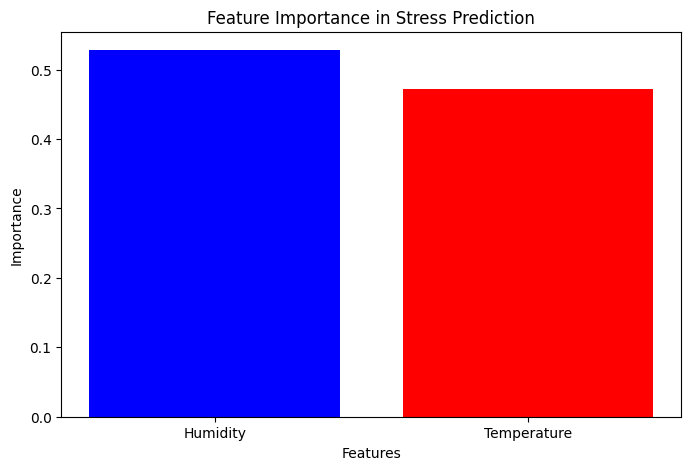

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
feature_importance = rf_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.bar(["Humidity", "Temperature"], feature_importance, color=["blue", "red"])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Stress Prediction")
plt.show()


In [14]:
import pandas as pd

# Sample new data
sample_input = pd.DataFrame([[60.5, 36.7]], columns=["Humidity", "Temperature"])

# Predict Stress Level
predicted_stress = rf_model.predict(sample_input)

print(f"Predicted Stress Level: {predicted_stress[0]}")


Predicted Stress Level: 2


To use the model with ESP32 & Google Colab, it is saved as a .pkl file.



In [16]:
import pickle

# Save Model
pickle.dump(rf_model, open("stress_model.pkl", "wb"))
